# Graph convolutional networks (GCN) Implementation on Terrorist Attack Dataset

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

## Process Involved

**Download Dataset:**

- Download the dataset from an external source.

**Data Extraction:**

- Extract the downloaded dataset.
- List the extracted files to verify.

**Data Preprocessing:**

- Convert the extracted files into CSV format.
- Map labels to integer IDs.
- Organize nodes and features to create a graph structure.

**GCN Model Implementation:**

- Create a graph using DGL, incorporating node features, labels, and adjacency information.
- Split the dataset into training, validation, and test sets.
- Define a GCN model architecture.
- Train the model for a specified number of epochs and learning rate.
- Track the best validation and test accuracies during training.
- Save the trained model for future use.

**Model Inference:**

- Preprocess input data to create a DGL graph.
- Use the trained GCN model for inference on the input data.
- Obtain predicted class labels from the model's output.
- Map the predicted class labels back to their original labels.

**Community Detection and Visualization:**

- Apply community detection to the graph using Louvain community detection.
- Assign nodes to different communities.
- Determine node colors based on community assignments.
- Visualize the graph with nodes colored by their communities.

**Conclusion:**

- Summarize the project's findings and outcomes.


In [42]:
import os
import urllib.request
import tarfile

# URL of the .tgz file
url = "https://linqs-data.soe.ucsc.edu/public/lbc/TerrorAttack.tgz"
# Destination directory for extraction
destination_dir = "/content/data/"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Download the .tgz file
tgz_file_path = os.path.join(destination_dir, "TerrorAttack.tgz")
urllib.request.urlretrieve(url, tgz_file_path)

# Extract the contents of the "terrorist_attack" directory from the .tgz file
with tarfile.open(tgz_file_path, "r:gz") as tar:
    tar.extractall(path=destination_dir)

# Clean up: Remove the downloaded .tgz file
os.remove(tgz_file_path)

# List the files in the destination directory to verify
extracted_files = os.listdir(destination_dir)
print("Files extracted to", destination_dir)
print(extracted_files)


Files extracted to /content/data/
['testing.csv', 'label.csv', 'features.csv', 'terrorist-attacks', 'edges.csv', 'nodes.csv']


In [43]:
import pandas as pd

# List of input files to convert
input_files = ['/content/data/terrorist-attacks/terrorist_attack.labels',
               '/content/data/terrorist-attacks/terrorist_attack.nodes',
               '/content/data/terrorist-attacks/terrorist_attack_loc.edges']

# Define the corresponding output file names
output_files = ['/content/data/terrorist-attacks/terrorist_attack_labels.csv',
               '/content/data/terrorist-attacks/terrorist_attack_nodes.csv',
               '/content/data/terrorist-attacks/terrorist_attack_loc_edges.csv']

# Loop through each input file and convert to CSV
for input_file, output_csv_file in zip(input_files, output_files):
    # Read the input file and split lines
    with open(input_file, 'r') as file:
        lines = file.readlines()

    # Split each line into columns (assuming it's tab-separated)
    data = [line.strip().split('\t') for line in lines]

    # Convert the data to a DataFrame
    df = pd.DataFrame(data)
    print(df.head(5))
    # Save the DataFrame to the specified output CSV file
    df.to_csv(output_csv_file, index=False, header=False)


                                                                   0
0         http://counterterror.mindswap.org/2005/terrorism.owl#Arson
1       http://counterterror.mindswap.org/2005/terrorism.owl#Bombing
2    http://counterterror.mindswap.org/2005/terrorism.owl#Kidnapping
3   http://counterterror.mindswap.org/2005/terrorism.owl#NBCR_Attack
4  http://counterterror.mindswap.org/2005/terrorism.owl#other_attack
                                                                                             0    \
0  http://counterterror.mindswap.org/2005/ict_events.owl#United_Popular_Action_Movement_19930513   
1                         http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19961112   
2                         http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19980428   
3        http://counterterror.mindswap.org/2005/ict_events.owl#Kurdistan_Worker_s_Party_19970325   
4                         http://counterterror.mindswap.org/2005/ict_events.owl#Unknow

In [44]:
import pandas as pd

# Read in the data
with open('/content/data/terrorist-attacks/terrorist_attack_loc_edges.csv') as f:
    data = f.read()

# Split on spaces into a list of rows
rows = [row.split(' ') for row in data.split('\n')]

# Create a DataFrame
df = pd.DataFrame(rows, columns=['source', 'destination'])
print(df.head(10))
# Export to a CSV file
df.to_csv('/content/data/edges.csv', index=False)

                                                                   source  \
0  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   
1  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   
2  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   
3  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   
4  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   
5  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   
6  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   
7  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   
8  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   
9  http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904   

                                                                                             destination  
0                                 http://coun

In [45]:
import csv

# Replace 'input.csv' with the actual filename that contains your CSV data.
input_filename = '/content/data/terrorist-attacks/terrorist_attack_nodes.csv'


# Lists to store URL1, URL2, and bit values
url1_list = []
url2_list = []
bit_values_list = []

# Open the input CSV file and process each row
with open(input_filename, 'r') as input_file:
    reader = csv.reader(input_file)

    for row in reader:
        url1 = row[0]
        bit_values = [int(bit) for bit in row[1:-1]]  # Convert string bits to integers
        url2 = row[-1]

        url1_list.append([url1])
        url2_list.append([url2])
        bit_values_list.append(bit_values)

# Create output CSV files for URL1, URL2, and bit values
output_url1_filename = '/content/data/nodes.csv'
output_url2_filename = '/content/data/label.csv'
output_bit_values_filename = '/content/data/features.csv'

# Custom headers for URL1 and URL2
url1_header = ['node']
url2_header = ['label']

with open(output_url1_filename, 'w', newline='') as url1_file:
    writer = csv.writer(url1_file)
    writer.writerow(url1_header)
    writer.writerows(url1_list)

with open(output_url2_filename, 'w', newline='') as url2_file:
    writer = csv.writer(url2_file)
    writer.writerow(url2_header)
    writer.writerows(url2_list)

with open(output_bit_values_filename, 'w', newline='') as bit_values_file:
    writer = csv.writer(bit_values_file)
    writer.writerows(bit_values_list)


In [46]:
node1 = pd.read_csv('/content/data/nodes.csv')
print(node1.head(5))

                                                                                            node
0  http://counterterror.mindswap.org/2005/ict_events.owl#United_Popular_Action_Movement_19930513
1                         http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19961112
2                         http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19980428
3        http://counterterror.mindswap.org/2005/ict_events.owl#Kurdistan_Worker_s_Party_19970325
4                         http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19990314


In [47]:
label2 = pd.read_csv('/content/data/label.csv')
print(label2.head(5))

                                                        label
0  http://counterterror.mindswap.org/2005/terrorism.owl#Arson
1  http://counterterror.mindswap.org/2005/terrorism.owl#Arson
2  http://counterterror.mindswap.org/2005/terrorism.owl#Arson
3  http://counterterror.mindswap.org/2005/terrorism.owl#Arson
4  http://counterterror.mindswap.org/2005/terrorism.owl#Arson


In [48]:
feature = pd.read_csv('/content/data/features.csv')
print(feature.head(5))

   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  1.8  0.88  0.89  0.90  \
0  0    0    0    0    0    0    0    0    0    0  ...    0     1     0     0   
1  0    0    0    0    0    0    0    0    0    0  ...    1     0     0     0   
2  0    0    0    0    0    0    0    0    0    0  ...    1     0     0     0   
3  0    0    0    0    0    0    0    0    0    0  ...    0     0     1     0   
4  0    0    0    0    0    0    0    0    0    0  ...    1     0     0     0   

   0.91  0.92  0.93  0.94  0.95  0.96  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 106 columns]


In [49]:
!pip install dgl
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp

In [50]:
import pandas as pd
nodes = pd.read_csv('/content/data/nodes.csv')#node URLs
labels = pd.read_csv('/content/data/label.csv')#corresponding labels
feat = pd.read_csv('/content/data/features.csv')#corresponding features
edges = pd.read_csv('/content/data/edges.csv')#edges in the form source, destination
src=list(edges['source'])
dst=list(edges['destination'])
num_node2=len(nodes)

print(num_node2)
print(src[:5])
print(dst[:5])

1293
['http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904', 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904', 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904', 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904', 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904']
['http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000903', 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19991104', 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19991107', 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19980312', 'http://counterterror.mindswap.org/2005/ict_events.owl#Red_Army_Faction_19890812']


In [51]:
#loading unique labels for mapping them to int ids
labelsm = pd.read_csv('/content/data/terrorist-attacks/terrorist_attack_labels.csv',header=None)
labelsm = labelsm.rename(columns={0: 'label'})
labelsm.head(10)


,label
0,http://counterterror.mindswap.org/2005/terrorism.owl#Arson
1,http://counterterror.mindswap.org/2005/terrorism.owl#Bombing
2,http://counterterror.mindswap.org/2005/terrorism.owl#Kidnapping
3,http://counterterror.mindswap.org/2005/terrorism.owl#NBCR_Attack
4,http://counterterror.mindswap.org/2005/terrorism.owl#other_attack
5,http://counterterror.mindswap.org/2005/terrorism.owl#Weapon_Attack


In [52]:
mapping = {}
for i in range(len(labelsm)):
    mapping[labelsm['label'][i]] = i

# Convert 'labels' elements to int IDs if they are strings
for i in range(len(labels['label'])):
    # Assuming 'labels' is a DataFrame with a 'label' column that may contain mixed data types (string and int)
    labels['label'] = labels['label'].apply(lambda x: x.strip() if isinstance(x, str) else x)


print(mapping)

{'http://counterterror.mindswap.org/2005/terrorism.owl#Arson': 0, 'http://counterterror.mindswap.org/2005/terrorism.owl#Bombing': 1, 'http://counterterror.mindswap.org/2005/terrorism.owl#Kidnapping': 2, 'http://counterterror.mindswap.org/2005/terrorism.owl#NBCR_Attack': 3, 'http://counterterror.mindswap.org/2005/terrorism.owl#other_attack': 4, 'http://counterterror.mindswap.org/2005/terrorism.owl#Weapon_Attack': 5}


In [53]:
# Initialize an integer counter to assign unique IDs to missing nodes
unique_id_counter = len(mapping)

for src_node in src:
    if src_node not in mapping:
        mapping[src_node] = unique_id_counter
        unique_id_counter += 1

for dst_node in dst:
    if dst_node not in mapping:
        mapping[dst_node] = unique_id_counter
        unique_id_counter += 1

print({k: mapping[k] for k in list(mapping)[:5]})

# Now you can proceed to create the graph
u = [mapping[src_node] for src_node in src]
v = [mapping[dst_node] for dst_node in dst]
g = dgl.graph((u, v), num_nodes=num_node2)

{'http://counterterror.mindswap.org/2005/terrorism.owl#Arson': 0, 'http://counterterror.mindswap.org/2005/terrorism.owl#Bombing': 1, 'http://counterterror.mindswap.org/2005/terrorism.owl#Kidnapping': 2, 'http://counterterror.mindswap.org/2005/terrorism.owl#NBCR_Attack': 3, 'http://counterterror.mindswap.org/2005/terrorism.owl#other_attack': 4}


In [54]:
#feature adjacency matrix
from numpy import genfromtxt
feat = genfromtxt('/content/data/features.csv', delimiter=',')
g.ndata['feat']=torch.from_numpy(feat)
g.ndata['feat']=g.ndata['feat'].type(torch.FloatTensor)
print(g.ndata)

{'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])}


In [55]:
#labels
g.ndata['label'] = torch.from_numpy(labels['label'].astype('category').cat.codes.to_numpy()).type(torch.LongTensor)

In [56]:
print(g)

Graph(num_nodes=1293, num_edges=3173,
      ndata_schemes={'feat': Scheme(shape=(106,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={})


In [57]:
import networkx as nx
import matplotlib.pyplot as plt

G = g.to_networkx()

# Run Louvain community detection using NetworkX
communities = nx.algorithms.community.louvain_communities(G)

# Get community index for each node
node_community = {}
for c, v_c in enumerate(communities):
    for v in v_c:
        node_community[v] = c

pos = nx.spring_layout(G, seed=42, k=0.15)

# Color nodes by community
node_colors = [node_community[n] for n in G.nodes()]

# Draw the graph with improved visual parameters
nx.draw(
    G,
    pos,
    node_color=node_colors,
    with_labels=False,
    node_size=23,
    cmap=plt.get_cmap('viridis'),
    edge_color='gray',
    linewidths=0.1,
    alpha=0.6
)

plt.show()

In [58]:
#train, validation, test split = 90%, 5%, 5%
n_nodes = len(nodes)
n_train = int(n_nodes* 0.9)
n_val = int(n_nodes* 0.05)
train_mask = torch.zeros(n_nodes, dtype=torch.bool)
val_mask = torch.zeros(n_nodes, dtype=torch.bool)
test_mask = torch.zeros(n_nodes, dtype=torch.bool)
train_mask[:n_train] = True
val_mask[n_train:n_train + n_val] = True
test_mask[n_train + n_val:] = True
g.ndata['train_mask'] = train_mask
g.ndata['val_mask'] = val_mask
g.ndata['test_mask'] = test_mask

In [59]:
print('Node features')
print(g.ndata)
g = dgl.add_self_loop(g)

Node features
{'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]]), 'label': tensor([0, 0, 0,  ..., 4, 4, 4]), 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]), 'val_mask': tensor([False, False, False,  ..., False, False, False]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True])}


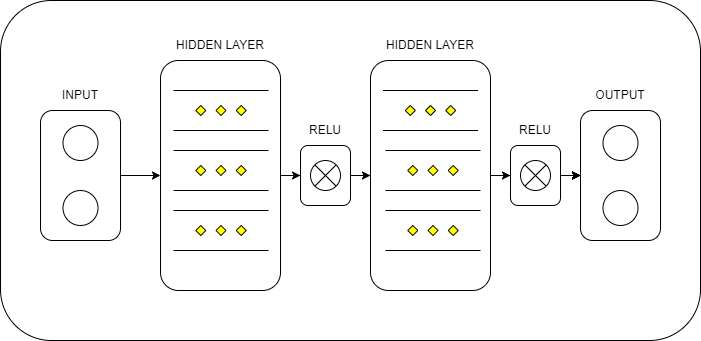

In [60]:
# # from dgl.nn import GraphConv

# # class GCN(nn.Module):
# #     def __init__(self, in_feats, h_feats, num_classes):
# #         super(GCN, self).__init__()
# #         self.conv1 = GraphConv(in_feats, h_feats,allow_zero_in_degree=True)
# #         self.conv1 = GraphConv(h_feats,s_feats, allow_zero_in_degree=True)
# #         self.conv2 = GraphConv(h_feats, num_classes,allow_zero_in_degree=True)

# #     def forward(self, g, in_feat):
# #         h = self.conv1(g, in_feat)
# #         h = F.relu(h)
# #         h = self.conv2(g, h)
# #         return h

# # #creating model
# # model = GCN(g.ndata['feat'].shape[1], 16 6)


import dgl
import dgl.nn as dglnn
import torch.nn as nn

# Create a GCN model
class GCNModel(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_layers):
        super(GCNModel, self).__init__()
        self.layers = nn.ModuleList()

        # Input layer
        self.layers.append(dglnn.GraphConv(in_feats, hidden_feats, activation=nn.ReLU()))

        # Hidden layers
        for _ in range(num_layers - 2):  # Subtract 2 to account for input and output layers
            self.layers.append(dglnn.GraphConv(hidden_feats, hidden_feats, activation=nn.ReLU()))

        # Output layer
        self.layers.append(dglnn.GraphConv(hidden_feats, out_feats))

    def forward(self, g, features):
        h = features
        for layer in self.layers:
            h = layer(g, h)
        return h

# Initialize the GCN model with more layers
in_feats = g.ndata['feat'].shape[1]
hidden_feats = 16
out_feats = 6
num_layers = 3

model = GCNModel(in_feats, hidden_feats, out_feats, num_layers)

# Now you can train and evaluate the model with more GCN layers


In [62]:
def train(g, model, num_epochs=20, learning_rate=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    best_val_acc = 0
    best_test_acc = 0

    for e in range(num_epochs):
        # Forward pass
        logits = model(g, g.ndata['feat'])

        # Compute predictions
        pred = logits.argmax(1)

        # Compute losses of the nodes in the training set
        loss = F.cross_entropy(logits[g.ndata['train_mask']], g.ndata['label'][g.ndata['train_mask']])

        # Compute accuracy on training/validation/test
        train_acc = (pred[g.ndata['train_mask']] == g.ndata['label'][g.ndata['train_mask']]).float().mean()
        val_acc = (pred[g.ndata['val_mask']] == g.ndata['label'][g.ndata['val_mask']]).float().mean()
        test_acc = (pred[g.ndata['test_mask']] == g.ndata['label'][g.ndata['test_mask']]).float().mean()

        # Save the best validation accuracy and the corresponding test accuracy
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f}), test acc: {:.3f} (best {:.3f})'.format(
            e, loss.item(), val_acc.item(), best_val_acc.item(), test_acc.item(), best_test_acc.item()))
    # Save the model's state dictionary and other relevant information
    torch.save({
        'model_state_dict': model.state_dict(),
        'best_val_acc': best_val_acc,
        'best_test_acc': best_test_acc,
    }, '/content/GCN_model.pth')
# Create a GCN model (use the same parameters as defined earlier)
model = GCNModel(in_feats, hidden_feats, out_feats, num_layers)

# Training
train(g, model, num_epochs=40, learning_rate=0.03)


In epoch 0, loss: 1.756, val acc: 0.531 (best 0.531), test acc: 0.621 (best 0.621)
In epoch 1, loss: 1.573, val acc: 1.000 (best 1.000), test acc: 1.000 (best 1.000)
In epoch 2, loss: 1.366, val acc: 1.000 (best 1.000), test acc: 1.000 (best 1.000)
In epoch 3, loss: 1.208, val acc: 1.000 (best 1.000), test acc: 1.000 (best 1.000)
In epoch 4, loss: 1.042, val acc: 0.969 (best 1.000), test acc: 0.985 (best 1.000)
In epoch 5, loss: 0.913, val acc: 0.875 (best 1.000), test acc: 0.879 (best 1.000)
In epoch 6, loss: 0.846, val acc: 0.828 (best 1.000), test acc: 0.712 (best 1.000)
In epoch 7, loss: 0.772, val acc: 0.844 (best 1.000), test acc: 0.803 (best 1.000)
In epoch 8, loss: 0.721, val acc: 0.891 (best 1.000), test acc: 0.909 (best 1.000)
In epoch 9, loss: 0.689, val acc: 0.906 (best 1.000), test acc: 0.939 (best 1.000)
In epoch 10, loss: 0.640, val acc: 0.906 (best 1.000), test acc: 0.939 (best 1.000)
In epoch 11, loss: 0.597, val acc: 0.891 (best 1.000), test acc: 0.909 (best 1.000)
In

In [63]:
# Load the saved model
checkpoint = torch.load('GCN_model.pth')

# Create a new model with the same architecture
loaded_model = GCNModel(in_feats, hidden_feats, out_feats, num_layers)

# Load the model's state dictionary
loaded_model.load_state_dict(checkpoint['model_state_dict'])

# Set the model to evaluation mode
loaded_model.eval()


GCNModel(
  (layers): ModuleList(
    (0): GraphConv(
      in=106, out=16, normalization=both
      (_activation): ReLU()
    )
    (1): GraphConv(
      in=16, out=16, normalization=both
      (_activation): ReLU()
    )
    (2): GraphConv(in=16, out=6, normalization=both, activation=None)
  )
)

In [64]:
import csv

input_filename = '/content/data/terrorist-attacks/terrorist_attack_nodes.csv'

# Lists to store URL1 and bit values
url1_bit_values_list = []

with open(input_filename, 'r') as input_file:
    reader = csv.reader(input_file, delimiter='\t')

    for row in reader:
        url1 = row[0]
        bit_values = row[1:-1]  # Exclude the first and last elements for bit values
        url1_bit_values_list.append([url1] + bit_values)  # Combine URL1 and bit values

# Create an output CSV file for URL1 and bit values
output_url1_bit_values_filename = '/content/data/testing.csv'

with open(output_url1_bit_values_filename, 'w', newline='') as url1_bit_values_file:
    writer = csv.writer(url1_bit_values_file)
    writer.writerows(url1_bit_values_list)

test_ = pd.read_csv('/content/data/testing.csv')
print(test_.head(5))

  http://counterterror.mindswap.org/2005/ict_events.owl#United_Popular_Action_Movement_19930513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,http://counterterror.mindswap.org/2005/terrorism.owl#Arson
0                        http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19961112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,http://counterterror.mindswap.org/2005/terrorism.owl#Arson
1                        http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19980428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [66]:
# import torch
# import dgl
import pandas as pd
# from your_GCN_model_module import GCNModel  # Import your GCN model class

# # Load the pre-trained GCN model
# model_path = 'path_to_pretrained_model.pth'
# model = GCNModel(in_feats, hidden_feats, out_feats, num_layers)  # Make sure to provide the correct model configuration
# model.load_state_dict(torch.load(model_path))
# model.eval()

# Define a function to preprocess input data and create a DGL graph
def preprocess_input_data(input_data):
    # Process your input data to create a DGL graph
    # Create a DGL graph 'g' from input_data, following the same process as during training

    return g

# Load your input data (e.g., from a CSV file)
input_data_path = '/content/data/testing.csv'
input_data = pd.read_csv(input_data_path)

# Preprocess the input data
g = preprocess_input_data(input_data)

# Perform inference
with torch.no_grad():
    logits = model(g, g.ndata['feat'])  # Pass the graph 'g' through the GCN model

# Convert logits to predicted class labels
predicted_class_labels = logits.argmax(dim=1)

import random
random_indexes = random.sample(range(len(predicted_class_labels)), 5)

print([predicted_class_labels[i] for i in random_indexes])

# Inverse mapping from integer IDs to class labels
inverse_mapping = {v: k for k, v in mapping.items()}

# Create a list of (index, class label) pairs
predicted_class_labels_with_labels = [(idx.item(), inverse_mapping[idx.item()]) for idx in predicted_class_labels]


# Print or use 'predicted_class_labels' for further analysis or actions
# print(predicted_class_labels_with_labels)
print([predicted_class_labels_with_labels[i] for i in random_indexes])

[tensor(1), tensor(2), tensor(4), tensor(1), tensor(4)]
[(1, 'http://counterterror.mindswap.org/2005/terrorism.owl#Bombing'), (2, 'http://counterterror.mindswap.org/2005/terrorism.owl#Kidnapping'), (4, 'http://counterterror.mindswap.org/2005/terrorism.owl#other_attack'), (1, 'http://counterterror.mindswap.org/2005/terrorism.owl#Bombing'), (4, 'http://counterterror.mindswap.org/2005/terrorism.owl#other_attack')]
